[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\skgba\AppData\Local\Temp\ipykernel_2360\2249333098.py:108: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(211)


gains (tradewise) :  0    -2.817516
1    45.504981
2     3.953064
3     1.814112
4     6.365575
5     1.908414
6    17.325348
7   -22.048191
8     8.095610
dtype: float64
sharpe ratio :  0.4288818000727452
0    24295.620883
1    35351.338658
2    36748.799616
3    37415.463969
4    39797.173215
5    40556.667871
6    47583.251860
7    37092.005756
8    40094.829971
dtype: float64
Max Drawdown :  -48.94081439650916


<Figure size 5000x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

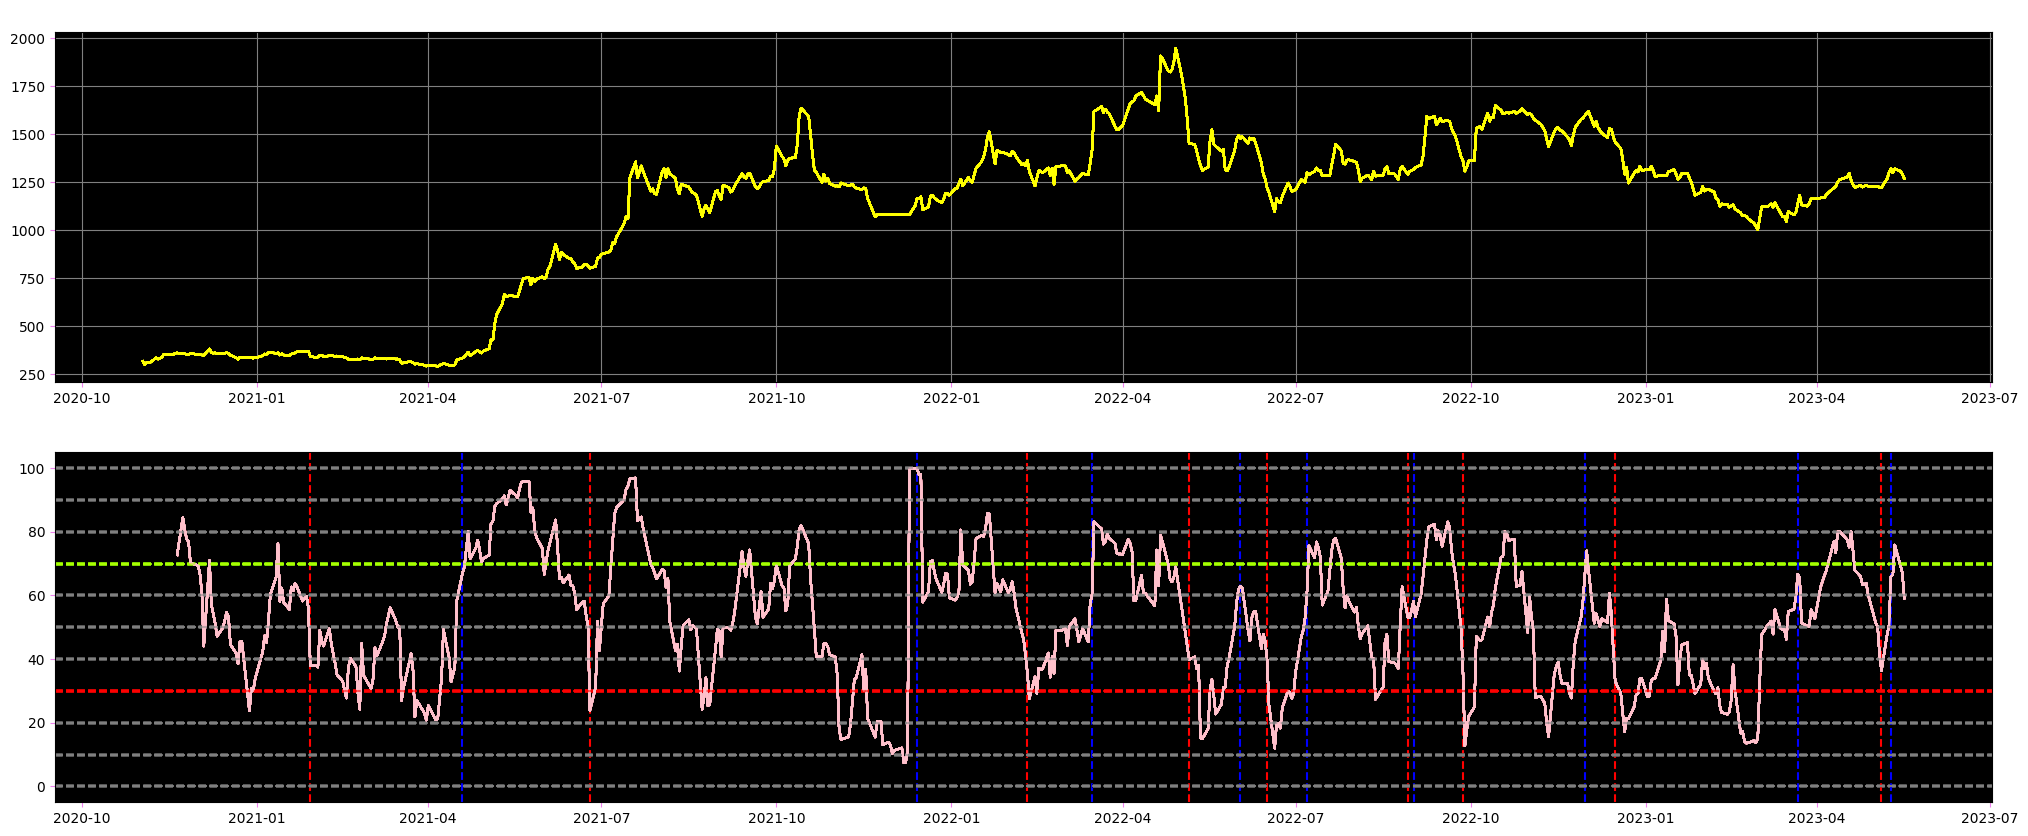

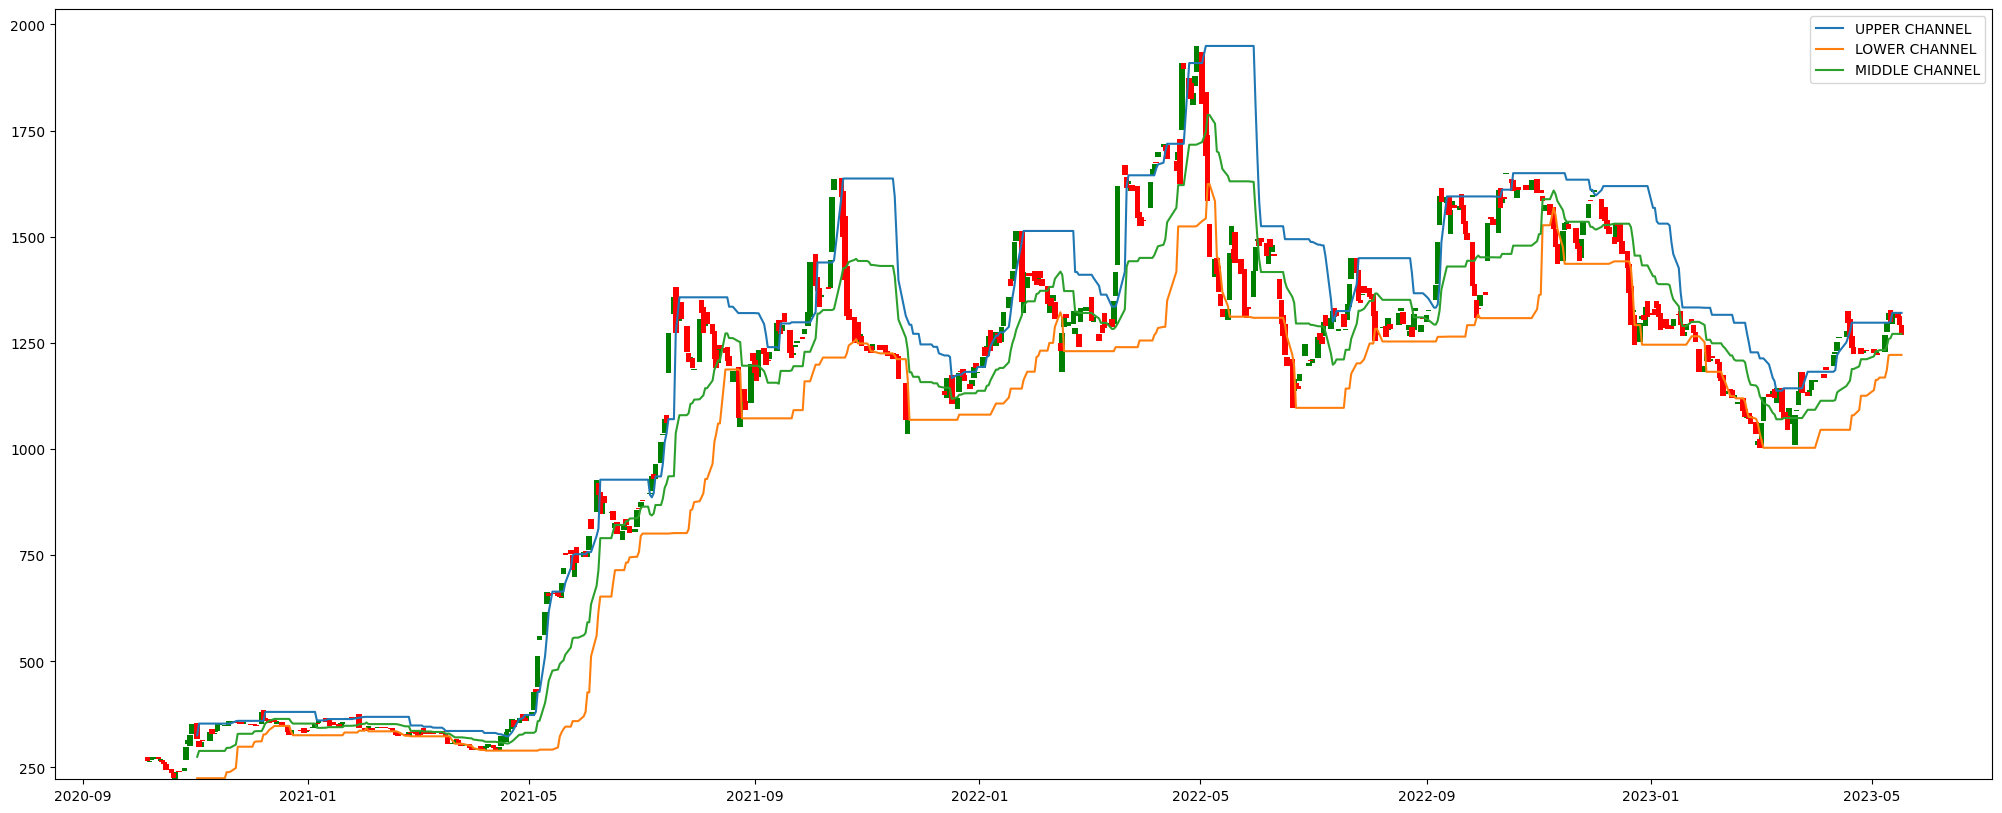

In [16]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date
stock = "ANGELONE.NS"
data = yf.download(stock,'2017-10-01','2023-05-18')
market=yf.download('^CRSLDX','2017-10-01','2023-05-18' )                                   #the NIFYT 500 is the index representing the broad market.
                                                        # HEnce we use that to calculate market returns and other analytical tools like sharpe ratio
pf_value=[25000];                                                     #let us consider the portolfolio to have an investment value of 25000 Rs.
data.to_csv('ADANI.csv')
plt.figure(figsize=(50,10));
def DC (data):

  UC=[];

                                                            # UC= UPPER CHANNEL : Highes of Highs in last 20 days
  for i in range (19,data.shape[0]-1):
    UC.append(np.max(data['Close'][i-19:i]))
  #print(pd.Series(UC))
  UC=pd.Series(UC, index=data.index[20:])
  #print(UC)

  LC=[];

  for i in range (19,data.shape[0]-1):          # LC= LOWER  CHANNEL : Lowest of Lows  in last 20 days
    LC.append(np.min(data['Close'][i-19:i]))

  LC=pd.Series(LC,index=data.index[20:])
 #print(LC)

  MC=(UC+LC)/2
 # print(MC)
  green_df=data[data.Close>=data.Open].copy()
  red_df=data[data.Close<data.Open].copy()
  #plt.figure(figsize=(25,10))
  #plt.figure.subplots_adjust(bottom=spacing)
  plt.figure(figsize=(25,10));
  plt.plot(data.index[20:], UC ,label="UPPER CHANNEL")
  plt.plot(data.index[20:],LC,label="LOWER CHANNEL")
  plt.plot(data.index[20:],MC,label="MIDDLE CHANNEL")
  plt.bar(green_df.index, green_df.Close-green_df.Open,width=3, bottom=green_df.Open, color='green')
  plt.bar(red_df.index, red_df.Open-red_df.Close, width=3,bottom=red_df.Close,color='red' )
  plt.legend()
  plt.tick_params(axis='x', which='major', labelsize=10)
  #plt.axvline('2019-11-01')
  #plt.show()
  #backtesting code just for bollinger bands
  nt=0; #number of buys that will be executed.
  ct=0; # keep check if there is an ongoing trade
  s1=data['Close'][20:]-UC
  s2=data['Close'][20:]-LC
  s3=data['Close'][20:]-MC
  return s1,s2,s3

  #proft=0;
gain=[];        # array to hold gains for individual traides
def DCf(data,s1,s2,s3,i):
    #gain=[]

    if (s3[i]>0 and (s3[i-1]<=0 or s3[i-2]<=0 or s3[i-3]<=0 or s3[i-4]<=0 or s3[i-5]<=0 )) :              #setting this condition indicates in crossover of stock price over middle channel
                                                                                                #from the lower to the higher side
      signal='b'
      #print("ent1");
      #print(data.index[i+20]);
      return signal

      # bp=data['Close'][i+20]
      # nt+=1;                                                         #backtestig that does not include shorting of stocks
      # ct=1;
    #  print({s2.index[i]})


    if (s3[i]<0 and (s3[i-1]>=0 or s3[i-2]>=0 or s3[i-3]>=0 or s3[i-4]>=0 or s3[i-5]>=0 )):                  #setting thiscondition indcae a crossover of stock prive over middle channel
      signal='s'                                                                                            #from upper to the lower side
      #print("ent2");
      #print(data.index[i+20]);
      return signal

    #   sp=data['Close'][i+20]
    #   ct=0;
    # #  print("yes")
    #   print((sp/bp -1) * 100);
    #   del bp;                    # remove the exsitence of buying price as it should exist only when a trade is ongoing
  #print(gain)
    #gain=pd.Series(gain)
plt.figure(figsize=(25,10))
def RSI(data):
    delta = data["Close"][20:].diff()
    #delta.dropna(inplace=True)
    positive = delta.copy()
    negative = delta.copy()

    positive[positive < 0] = 0
    negative[negative > 0] = 0
    days = 14
    avg_gain = positive.rolling(window=days).mean()
    avg_loss = abs(negative.rolling(window=days).mean())

    RS = avg_gain/avg_loss
    RSI = 100.0 - (100.0 / (1.0 + RS))
    combined = pd.DataFrame()
    combined.index=data.index[20:]
    combined['Close']= data['Close'][20:]
    combined['RSI']= RSI
    #plotting RSI
    #plt.figure(figsize=(12,8))
    ax1 = plt.subplot(211)
    ax1.plot(combined.index, combined['Close'], color = 'yellow')
    ax1.set_title("adjusted close price", color = 'white')
    ax1.grid(True, color = 'grey')
    ax1.set_axisbelow(True)
    ax1.set_facecolor('black')
    ax1.figure.set_facecolor('white')
    ax1.tick_params(axis='x',color='violet')
    ax1.tick_params(axis='y',color='violet')

    ax2 = plt.subplot(212, sharex=ax1)
    ax2.plot(combined.index , combined['RSI'] , color = 'pink')
    ax2.axhline(0, linestyle = '--' , alpha = 0.5 , color = 'grey')
    ax2.axhline(10, linestyle = '--' , alpha = 0.5 , color = 'grey')
    ax2.axhline(20, linestyle = '--' , alpha = 0.5 , color = 'grey')
    ax2.axhline(30, linestyle = '--' , alpha = 0.5 , color = 'red')
    ax2.axhline(40, linestyle = '--' , alpha = 0.5 , color = 'grey')
    ax2.axhline(50, linestyle = '--' , alpha = 0.5 , color = 'grey')
    ax2.axhline(60, linestyle = '--' , alpha = 0.5 , color = 'grey')
    ax2.axhline(70, linestyle = '--' , alpha = 0.5 , color = '#AAFF00')
    ax2.axhline(80, linestyle = '--' , alpha = 0.5 , color = 'grey')
    ax2.axhline(90, linestyle = '--' , alpha = 0.5 , color = 'grey')
    ax2.axhline(100, linestyle = '--' , alpha = 0.5 , color = 'grey')
    ax2.set_title('RSI Value', color= 'white')
    ax2.grid(False)
    ax2.set_axisbelow(True)
    ax2.set_facecolor('black')
    ax2.figure.set_facecolor('white')
    ax2.tick_params(axis='x',color='violet')
    ax2.tick_params(axis='y',color='violet')
    return combined

ex=[] #list to store excess retursn of every trade
gain=[];                                                     #list of trade wise excess returns
def exret(start,end,gain):
  m_gain=(-market.loc[start,'Close']+market.loc[end,'Close'])/market.loc[start,'Close']*100;
  ex.append(gain-m_gain);
  pf_value.append(pf_value[-1]*(gain/100)+pf_value[-1])                                                   #calculatesthe portfolio value after every trade
  #print("last value", pf_value[-1])
ctf=False;           #ctf indicates current position
nt=0;                   # tracks the number of trades
s1,s2,s3=DC(data)

timeperiod=[];
#print(s3)
for i in range (0,data.shape[0]-20):
  if ctf==False and DCf(data,s1,s2,s3,i)=='s' and (RSI(data).RSI[i]<40 or RSI(data).RSI[i-1]<40 or RSI(data).RSI[i-2]<40 or RSI(data).RSI[i-3]<40):
      bp=data['Close'][i+20];
      ct_start=data.index[i+20];                       #start of current trade position
      nt+=1;                                                         #backtestig that does not include shorting of stocks
      ctf=True;
      date=pd.to_datetime(ct_start);
      plt.axvline(x=date, color='r', linestyle='--' )                                                     # since RSI is used a supporting indicator we relax the
                                                                        # conditons for the stock to be in overbought/overls=sold levels.

      #print('YEs')
  if ctf==True and DCf(data,s1,s2,s3,i)=='b' and (RSI(data).RSI[i]>60 or RSI(data).RSI[i-1]>60 or RSI(data).RSI[i-2]>60 or RSI(data).RSI[i-3]>60) :
      sp=data['Close'][i+20];
      c_gain=(sp/bp -1) *100  ;                    #current trade's gain
      gain.append(c_gain);
      ct_end=data.index[i+20];
      exret(ct_start,ct_end,c_gain)                                                 #end of current trade position
      ctf=False;
      delta=(ct_end-ct_start).total_seconds()                                #converting time delta array to jjust seconds
      timeperiod.append(delta);
      #print((sp/bp -1) * 100);
      del bp;
      #print('NO')
      date=pd.to_datetime(ct_end);
      plt.axvline(x=date, color='b', linestyle='--' )
#print(ex);
gain=pd.Series(gain);
timeperiod=pd.Series(timeperiod);
                                            #calculating per day return of every trade

ex=pd.Series(ex)
avg_ret=gain.mean();
avg_tp=timeperiod.mean();
def sortino(gain):
    downside=gain[gain<0]*(avg_tp)/(365*24*3600);

    sr=(avg_ret - (7.09*(avg_tp)/(365*24*3600)) )/np.std(downside);
    print("sortino : ",sr);
    #print(sr);

#print(ex)
#print(np.std(ex))
print("gains (tradewise) : ",gain)
shratio=(avg_ret-(7.09*(avg_tp)/(365*24*3600)))/np.std(ex);                          #calcualting sharpe ratio  after annualzing the return
print("sharpe ratio : ",shratio)
#sortino(gain)
pf_value=pd.Series(pf_value[1:]);
MDD=(pf_value.min()-pf_value.max())/pf_value.max() *100
print(pf_value);
print("Max Drawdown : ", MDD );
plt.show()
plt.show(DC(data))